In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
SONGS = pd.read_csv("bimmuda_per_song_full.csv")

When I first reviewed the dataset and decided to focus on how change in a song impacts its charting success, I found it difficult to decide what kind of change to observe. I started by determining how many songs had each of the changes below.

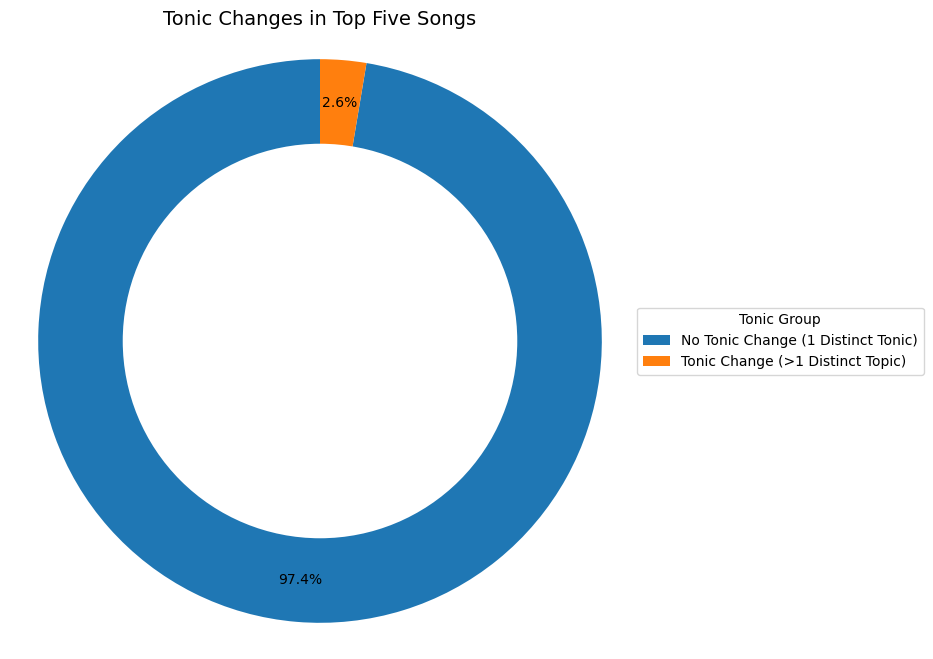

In [6]:
# songs with changing tonic
SONGS['Chart_Position'] = SONGS['Position'].astype(str).str.replace(r'[a-zA-Z]', '', regex=True)
SONGS['Chart_Position'] = pd.to_numeric(SONGS['Chart_Position'], errors = 'coerce')

tonic_cols = ['Tonic 1','Tonic 2','Tonic 3']

def count_distinct(row, cols):
    valid_elements = row[cols].dropna().unique()
    return len(valid_elements)

SONGS['Distinct_Tonic_Count'] = SONGS.apply(lambda row: count_distinct(row, tonic_cols), axis = 1)
SONGS_comp = SONGS.dropna(subset = ['Chart_Position', 'Distinct_Tonic_Count']).copy()
SONGS_comp = SONGS_comp[SONGS_comp['Chart_Position'].isin([1, 2, 3, 4, 5])]
SONGS_comp['Tonic_Change_Group'] = np.where(SONGS_comp['Distinct_Tonic_Count'] == 1, 'No Tonic Change (1 Distinct Tonic)', 'Tonic Change (>1 Distinct Topic)')

tonic_analysis = SONGS_comp.groupby('Tonic_Change_Group').agg(Total_Songs = ('Chart_Position', 'count'), Rank_1_Count = ('Chart_Position', lambda x: (x == 1).sum())).reset_index()

tonic_analysis['Rank_1_Success'] = tonic_analysis['Rank_1_Count'] / tonic_analysis['Total_Songs']
tonic_analysis['Rank_1_Success_Percentage'] = tonic_analysis['Rank_1_Success'] * 100

plot_data = SONGS_comp['Tonic_Change_Group'].value_counts()

plt.figure(figsize=(8,8))
wedge, text, autotexts = plt.pie(
    plot_data.values, 
    autopct = '%1.1f%%',
    startangle = 90,
    pctdistance = 0.85,
    colors = ['#1f77b4', '#ff7f0e']
)

centre_circle = plt.Circle((0, 0), 0.70, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(wedge, plot_data.index.tolist(), title = 'Tonic Group', loc = 'center left', bbox_to_anchor = (1, 0, 0.5, 1))
plt.title('Tonic Changes in Top Five Songs', fontsize = 14)
plt.axis('equal')
plt.show()

This donut chart showed me that most songs in my dataset did not have tonic changes. Therefore, my data was biased towards having a song with no change. I also decided that in a presentation setting, this visualization may not be the clearest for an audience member to see. In the code below, I determined whether this overwhelming amount of unchanging songs also existed when considering mode instead of tonic.

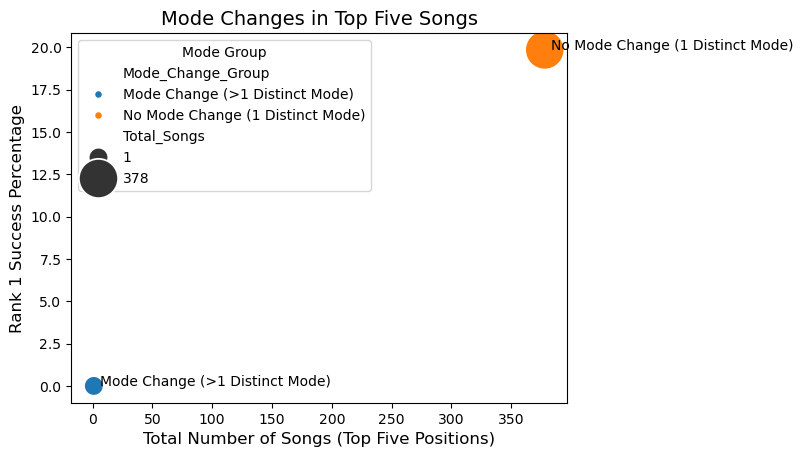

In [22]:
# songs with changing mode
SONGS['Chart_Position'] = SONGS['Position'].astype(str).str.replace(r'[a-zA-Z]', '', regex=True)
SONGS['Chart_Position'] = pd.to_numeric(SONGS['Chart_Position'], errors = 'coerce')

mode_cols = ['Mode 1','Mode 2','Mode 3']

def count_distinct(row, cols):
    valid_elements = row[cols].dropna().unique()
    return len(valid_elements)

SONGS['Distinct_Mode_Count'] = SONGS.apply(lambda row: count_distinct(row, mode_cols), axis = 1)
SONGS_comp = SONGS.dropna(subset = ['Chart_Position', 'Distinct_Mode_Count']).copy()
SONGS_comp = SONGS_comp[SONGS_comp['Chart_Position'].isin([1, 2, 3, 4, 5])]
SONGS_comp['Mode_Change_Group'] = np.where(SONGS_comp['Distinct_Mode_Count'] == 1, 'No Mode Change (1 Distinct Mode)', 'Mode Change (>1 Distinct Mode)')

mode_analysis = SONGS_comp.groupby('Mode_Change_Group').agg(Total_Songs = ('Chart_Position', 'count'), Rank_1_Count = ('Chart_Position', lambda x: (x == 1).sum())).reset_index()

mode_analysis['Rank_1_Success'] = mode_analysis['Rank_1_Count'] / mode_analysis['Total_Songs']
mode_analysis['Rank_1_Success_Percentage'] = mode_analysis['Rank_1_Success'] * 100

plot_data = SONGS_comp['Mode_Change_Group'].value_counts()

sns.scatterplot(
    x = 'Total_Songs',
    y = 'Rank_1_Success_Percentage',
    hue = 'Mode_Change_Group',
    size = 'Total_Songs',
    sizes = (200, 800),
    data = mode_analysis,
    palette = ['#1f77b4', '#ff7f0e']
)

for index, row in mode_analysis.iterrows():
    plt.text(
        row['Total_Songs'] + 5,
        row['Rank_1_Success_Percentage'],
        row['Mode_Change_Group'],
        fontsize = 10,
        ha = 'left'
    )

plt.legend(title = 'Mode Group', loc = 'upper left')
plt.title('Mode Changes in Top Five Songs', fontsize = 14)
plt.xlabel('Total Number of Songs (Top Five Positions)', fontsize = 12)
plt.ylabel('Rank 1 Success Percentage', fontsize = 12)
plt.show()

Once again, this scatterplot visualization and use of mode to determine change proved ineffective. I then attempted to make change comparisons by observing changes in tempo, or BPM.

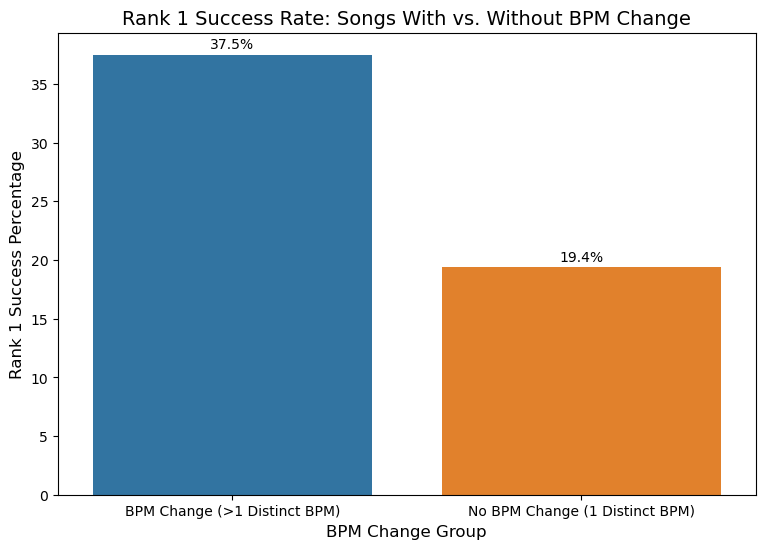

In [21]:
# songs with changing bpm
SONGS['Chart_Position'] = SONGS['Position'].astype(str).str.replace(r'[a-zA-Z]', '', regex=True)
SONGS['Chart_Position'] = pd.to_numeric(SONGS['Chart_Position'], errors = 'coerce')

bpm_cols = ['BPM 1','BPM 2','BPM 3']

def count_distinct(row, cols):
    valid_elements = row[cols].dropna().unique()
    return len(valid_elements)

SONGS['Distinct_BPM_Count'] = SONGS.apply(lambda row: count_distinct(row, bpm_cols), axis = 1)
SONGS_comp = SONGS.dropna(subset = ['Chart_Position', 'Distinct_BPM_Count']).copy()
SONGS_comp = SONGS_comp[SONGS_comp['Chart_Position'].isin([1, 2, 3, 4, 5])]
SONGS_comp['BPM_Change_Group'] = np.where(SONGS_comp['Distinct_BPM_Count'] == 1, 'No BPM Change (1 Distinct BPM)', 'BPM Change (>1 Distinct BPM)')

bpm_analysis = SONGS_comp.groupby('BPM_Change_Group').agg(Total_Songs = ('Chart_Position', 'count'), Rank_1_Count = ('Chart_Position', lambda x: (x == 1).sum())).reset_index()

bpm_analysis['Rank_1_Success'] = bpm_analysis['Rank_1_Count'] / bpm_analysis['Total_Songs']
bpm_analysis['Rank_1_Success_Percentage'] = bpm_analysis['Rank_1_Success'] * 100

plot_data_bar = bpm_analysis.sort_values(by = 'Rank_1_Success_Percentage', ascending = False)

plt.figure(figsize = (9, 6))
sns.barplot(
    x = 'BPM_Change_Group',
    y = 'Rank_1_Success_Percentage',
    data = plot_data_bar,
    palette = ['#1f77b4', '#ff7f0e']
)

for index, row in plot_data_bar.iterrows():
    plt.text(
        index,
        row['Rank_1_Success_Percentage'] + 0.5,
        f"{row['Rank_1_Success_Percentage']:.1f}%",
        color = 'black',
        ha = 'center',
        fontsize = 10
    )

plt.title('Rank 1 Success Rate: Songs With vs. Without BPM Change', fontsize = 14)
plt.xlabel('BPM Change Group', fontsize = 12)
plt.ylabel('Rank 1 Success Percentage', fontsize = 12)
plt.show()

This visualization helped me to conclude that a bar plot would be the most effective method of showcasing my data in my infographic. However, this graph still showed that the BPM feature still did not show a clear relationship between undergoing change and reaching the #1 song ranking.


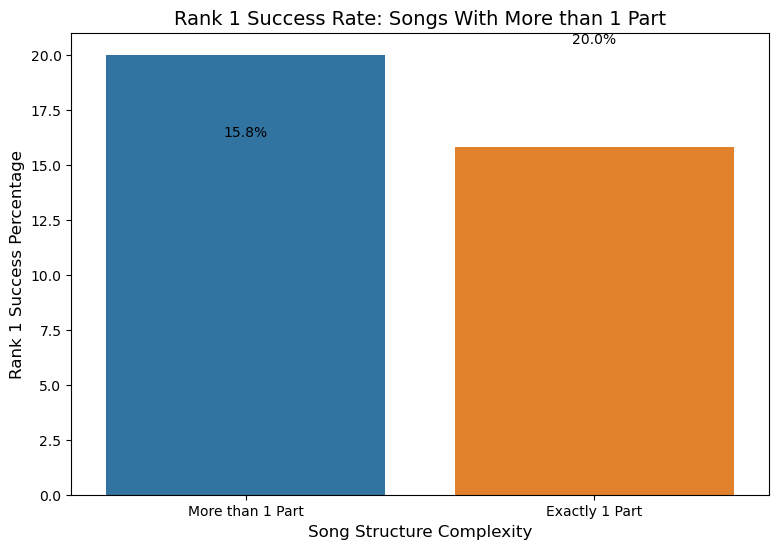

In [24]:
# song with more than 1 part
SONGS['Chart_Position'] = SONGS['Position'].astype(str).str.replace(r'[a-zA-Z]', '', regex=True)
SONGS['Chart_Position'] = pd.to_numeric(SONGS['Chart_Position'], errors = 'coerce')

SONGS_comp = SONGS.dropna(subset = ['Chart_Position', 'Distinct_BPM_Count']).copy()
SONGS_comp = SONGS_comp[SONGS_comp['Chart_Position'].isin([1, 2, 3, 4, 5])]
SONGS_comp['Parts_Group'] = np.where(SONGS_comp['Number of Parts'] > 1, 'More than 1 Part', 'Exactly 1 Part')

parts_analysis = SONGS_comp.groupby('Parts_Group').agg(Total_Songs = ('Chart_Position', 'count'), Rank_1_Count = ('Chart_Position', lambda x: (x == 1).sum())).reset_index()

parts_analysis['Rank_1_Success'] = parts_analysis['Rank_1_Count'] / parts_analysis['Total_Songs']
parts_analysis['Rank_1_Success_Percentage'] = parts_analysis['Rank_1_Success'] * 100

plot_data_bar = parts_analysis.sort_values(by = 'Rank_1_Success_Percentage', ascending = False)

plt.figure(figsize = (9, 6))
sns.barplot(
    x = 'Parts_Group',
    y = 'Rank_1_Success_Percentage',
    data = plot_data_bar,
    palette = ['#1f77b4', '#ff7f0e']
)

for index, row in plot_data_bar.iterrows():
    plt.text(
        index,
        row['Rank_1_Success_Percentage'] + 0.5,
        f"{row['Rank_1_Success_Percentage']:.1f}%",
        color = 'black',
        ha = 'center',
        fontsize = 10
    )

plt.title('Rank 1 Success Rate: Songs With More than 1 Part', fontsize = 14)
plt.xlabel('Song Structure Complexity', fontsize = 12)
plt.ylabel('Rank 1 Success Percentage', fontsize = 12)
plt.show()

Since most songs in the dataset had more than 1 part, I decided what songs were "complex" through their parts by determining what songs had the most parts and, therefore, underwent the most change. I did this by finding the average number of parts, then determining the 75th percentile of part amounts.

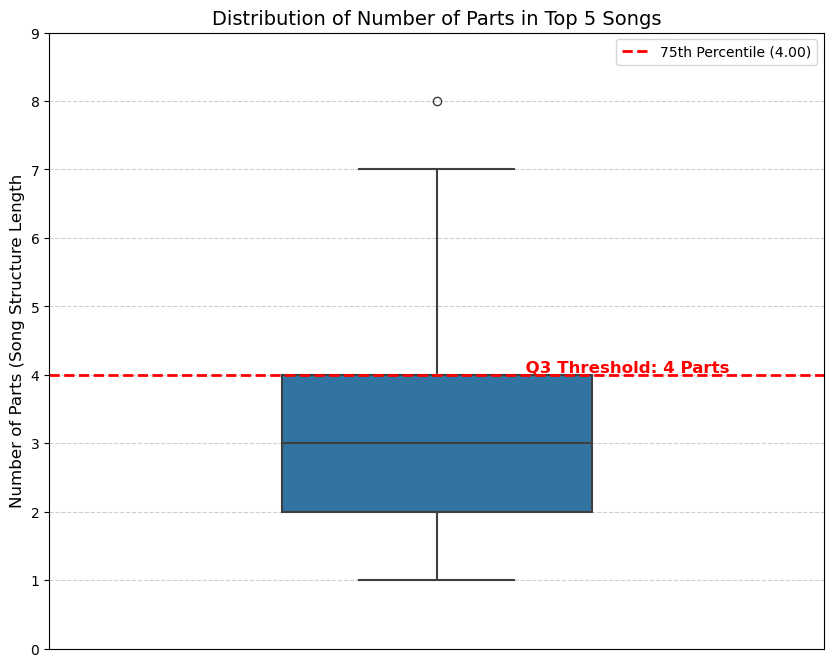

In [38]:
percentile_75 = SONGS_comp['Number of Parts'].quantile(0.75)

plt.figure(figsize = (10, 8))

sns.boxplot(y = SONGS_comp['Number of Parts'], color = '#1f77b4', linewidth = 1.5, width = 0.4)

plt.axhline(
    percentile_75,
    color = 'red',
    linestyle = '--',
    linewidth = 2,
    label = f'75th Percentile ({percentile_75:.2f})'
)

plt.text(0.1, percentile_75, f'  Q3 Threshold: {percentile_75:.0f} Parts', verticalalignment = 'bottom', color = 'red', fontweight = 'bold', fontsize = 12)

plt.title('Distribution of Number of Parts in Top 5 Songs', fontsize = 14)
plt.ylabel('Number of Parts (Song Structure Length', fontsize = 12)
plt.xticks([], [])
plt.ylim(0, SONGS_comp['Number of Parts'].max() + 1)
plt.legend(loc = 'upper right')
plt.grid(True, linestyle = '--', alpha = 0.6, axis = 'y')
plt.show()

All of these visualizations revealed to me that because there were so few songs undergoing these changes individually, my data would be skewed towards songs having no change. I wanted to make sure that my findings reflected ranking performance regardless of how many more simple songs there were than complex ones. To even out the amount of songs with and without change without changing the data itself, I decided to combine all of the calculations I completed above. My final visualizations on my infographic characterize a song as "complex" if they satisfy 1 or more of the criteria I observed: change in tempo, change in mode, change in tonic, or having more than 4 parts.

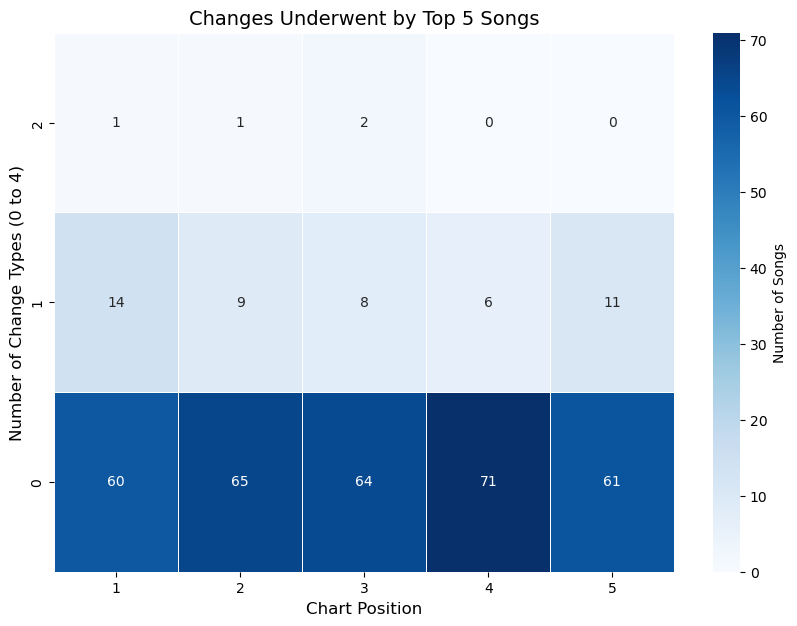

In [26]:
SONGS['Chart_Position'] = SONGS['Position'].astype(str).str.replace(r'[a-zA-Z]', '', regex=True)
SONGS['Chart_Position'] = pd.to_numeric(SONGS['Chart_Position'], errors = 'coerce')

bpm_cols = ['BPM 1','BPM 2','BPM 3']
tonic_cols = ['Tonic 1','Tonic 2','Tonic 3']
mode_cols = ['Mode 1','Mode 2','Mode 3']

def count_distinct(row, cols):
    valid_elements = row[cols].dropna().unique()
    return len(valid_elements)

SONGS['Distinct_BPM_Count'] = SONGS.apply(lambda row: count_distinct(row, bpm_cols), axis = 1)
SONGS['Distinct_Tonic_Count'] = SONGS.apply(lambda row: count_distinct(row, tonic_cols), axis = 1)
SONGS['Distinct_Mode_Count'] = SONGS.apply(lambda row: count_distinct(row, mode_cols), axis = 1)

SONGS_comp = SONGS.dropna(subset = ['Chart_Position', 'Number of Parts', 'Distinct_BPM_Count', 'Distinct_Tonic_Count', 'Distinct_Mode_Count']).copy()
SONGS_comp = SONGS_comp[SONGS_comp['Chart_Position'].isin([1, 2, 3, 4, 5])]

SONGS_comp['Is_Tonic_Change'] = (SONGS_comp['Distinct_Tonic_Count'] > 1).astype(int)
SONGS_comp['Is_Mode_Change'] = (SONGS_comp['Distinct_Mode_Count'] > 1).astype(int)
SONGS_comp['Is_BPM_Change'] = (SONGS_comp['Distinct_BPM_Count'] > 1).astype(int)
SONGS_comp['Is_Many_Parts'] = (SONGS_comp['Number of Parts'] > 4).astype(int)

complexity_cols = ['Is_Tonic_Change', 'Is_Mode_Change', 'Is_BPM_Change', 'Is_Many_Parts']
SONGS_comp['Total_Changes'] = SONGS_comp[complexity_cols].sum(axis = 1)

heatmap_data = SONGS_comp.pivot_table(
    index = 'Total_Changes',
    columns = 'Chart_Position',
    values = 'Position',
    aggfunc = 'count'
).fillna(0)

heatmap_data.columns = heatmap_data.columns.astype(int)
heatmap_data = heatmap_data.sort_index(ascending = False)

plt.figure(figsize = (10, 7))
sns.heatmap(
    heatmap_data,
    annot = True,
    fmt = 'g',
    cmap = 'Blues',
    linewidths = 0.5,
    linecolor = 'white',
    cbar_kws = {'label': 'Number of Songs'}
)

plt.title('Changes Underwent by Top 5 Songs', fontsize = 14)
plt.xlabel('Chart Position', fontsize = 12)
plt.ylabel('Number of Change Types (0 to 4)', fontsize = 12)
plt.show()

In [30]:
SONGS['Chart_Position'] = SONGS['Position'].astype(str).str.replace(r'[a-zA-Z]', '', regex=True)
SONGS['Chart_Position'] = pd.to_numeric(SONGS['Chart_Position'], errors = 'coerce')

bpm_cols = ['BPM 1','BPM 2','BPM 3']
tonic_cols = ['Tonic 1','Tonic 2','Tonic 3']
mode_cols = ['Mode 1','Mode 2','Mode 3']

def count_distinct(row, cols):
    valid_elements = row[cols].dropna().unique()
    return len(valid_elements)

SONGS['Distinct_BPM_Count'] = SONGS.apply(lambda row: count_distinct(row, bpm_cols), axis = 1)
SONGS['Distinct_Tonic_Count'] = SONGS.apply(lambda row: count_distinct(row, tonic_cols), axis = 1)
SONGS['Distinct_Mode_Count'] = SONGS.apply(lambda row: count_distinct(row, mode_cols), axis = 1)

SONGS_comp = SONGS.dropna(subset = ['Chart_Position', 'Number of Parts', 'Distinct_BPM_Count', 'Distinct_Tonic_Count', 'Distinct_Mode_Count']).copy()
SONGS_comp = SONGS_comp[SONGS_comp['Chart_Position'].isin([1, 2, 3, 4, 5])]

groups = (SONGS_comp['Distinct_BPM_Count'] == 1) & (SONGS_comp['Number of Parts'] <= 4) & (SONGS_comp['Distinct_Tonic_Count'] == 1) & (SONGS_comp['Distinct_Mode_Count'] == 1)

SONGS_comp['Complexity_Group'] = np.where(groups, 'Simple (No Change)', 'Complex (Any Change)')

total_counts = SONGS_comp['Complexity_Group'].value_counts()

SONGS_rank_1 = SONGS_comp[SONGS_comp['Chart_Position'] == 1]
rank_1_counts = SONGS_rank_1['Complexity_Group'].value_counts()

analysis_counts = SONGS_comp.groupby('Complexity_Group').agg(Total_Songs = ('Chart_Position', 'count'), Rank_1_Songs = ('Chart_Position', lambda x: (x == 1).sum())).reset_index()
analysis_counts['Rank_1_Success_Ratio'] = analysis_counts['Rank_1_Songs'] / analysis_counts['Total_Songs']
plot_data_ratio = analysis_counts.sort_values(by = 'Rank_1_Success_Ratio', ascending = False)
plot_data_ratio['Rank_1_Success_Percentage'] = plot_data_ratio['Rank_1_Success_Ratio'] * 100

After previously attempting to create a donut chart, I decided that a pie chart would successfully showcase my data so that an audience could better interpret it.


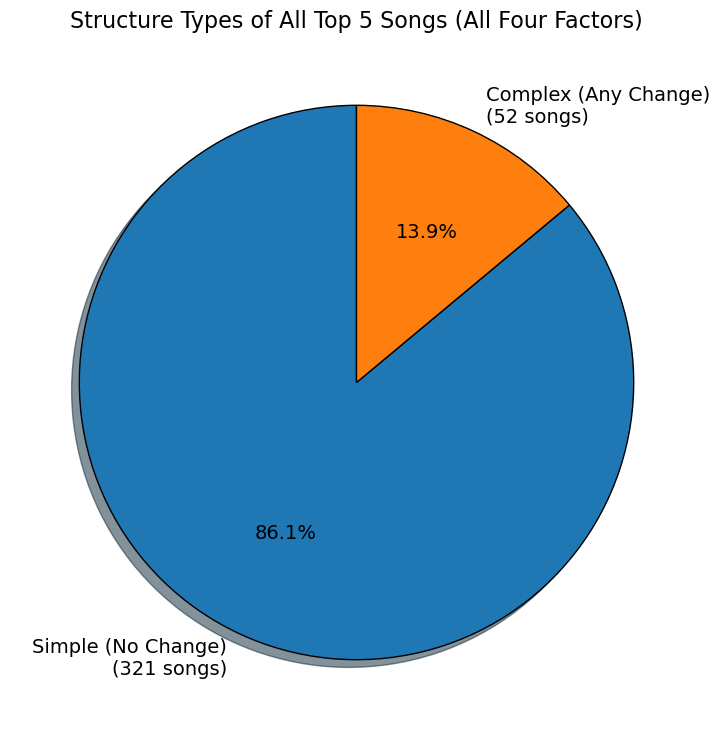

In [31]:
plt.figure(figsize=(9,9))
labels = [f'{k}\n({v} songs)' for k, v in total_counts.items()]
sizes = total_counts.values
colors = ['#1f77b4', '#ff7f0e']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', colors = colors, shadow = True, startangle = 90, textprops = {'fontsize': 14, 'color': 'black'}, wedgeprops = {'edgecolor': 'black', 'linewidth': 1})
plt.title('Structure Types of All Top 5 Songs (All Four Factors)', fontsize = 16)
plt.show()

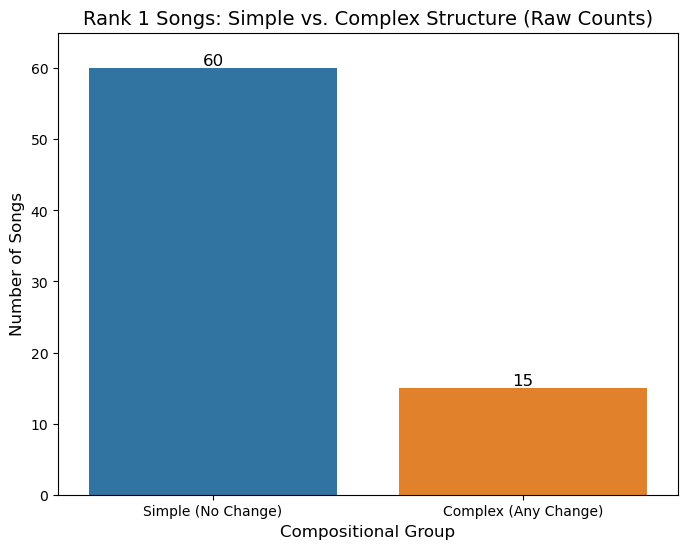

In [32]:
plt.figure(figsize=(8,6))
bars = sns.barplot(x = rank_1_counts.index, y = rank_1_counts.values, palette = ['#1f77b4', '#ff7f0e'], order = rank_1_counts.index)
plt.title('Rank 1 Songs: Simple vs. Complex Structure (Raw Counts)', fontsize = 14)
plt.xlabel('Compositional Group', fontsize = 12)
plt.ylabel('Number of Songs', fontsize = 12)
plt.xticks(rotation = 0)

for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha = 'center', va = 'bottom', fontsize = 12, color = 'black')

plt.ylim(0, rank_1_counts.values.max() + 5)
plt.show()

The pie chart above reflects all possible criteria for undergoing change during a song. I noticed that there is still an overwhelming amount of songs that are considered "simple" and do not undergo any changes. I felt that this data alone was not indicative enough of a relationship between song complexity and ranking. This bias is why I have been calculating the success rates of songs to reach the #1 rank. Not only would this calculation show how successful each type of song was, but it would also show the likelihood of a song topping the charts given that it is in the top five songs from its release year (the dataset only records these top five songs from each year).

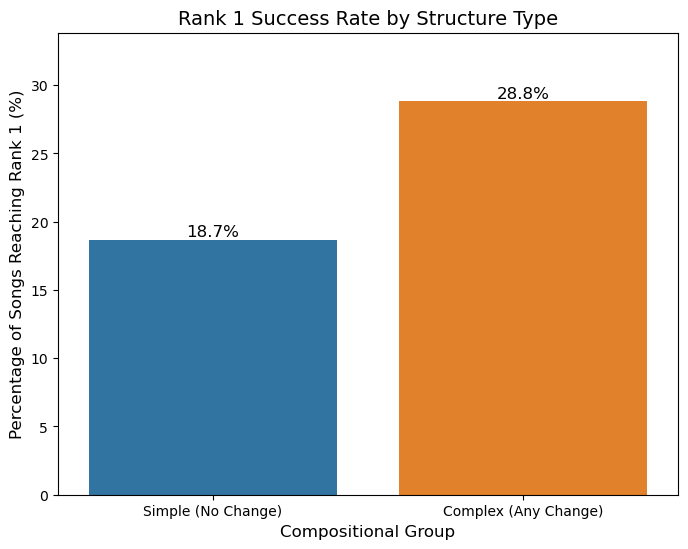

In [40]:
plt.figure(figsize=(8,6))
custom_order = ['Simple (No Change)', 'Complex (Any Change)']
bars = sns.barplot(x = 'Complexity_Group', y = 'Rank_1_Success_Percentage', data = plot_data_ratio, palette = ['#1f77b4', '#ff7f0e'], order = custom_order)
plt.title('Rank 1 Success Rate by Structure Type', fontsize = 14)
plt.xlabel('Compositional Group', fontsize = 12)
plt.ylabel('Percentage of Songs Reaching Rank 1 (%)', fontsize = 12)
plt.xticks(rotation = 0)

for bar in bars.patches:
    bars.annotate(f'{bar.get_height():.1f}%', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha = 'center', va = 'bottom', fontsize = 12, color = 'black')

plt.ylim(0, plot_data_ratio['Rank_1_Success_Percentage'].max() + 5)
plt.show()